In [1]:
"""
Annihilation Products multiplicity
@aurthor Jiancheng Zeng
@December 13 2021
"""

'\nAnnihilation Products multiplicity\n@aurthor Jiancheng Zeng\n@December 13 2021\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [3]:
print("reading data...")
anti_He3_ORI = np.array(pd.read_table("/mnt/hdd/jiancheng/GRAMS/GRAMS_local/GRAMS_2021/output/ORI_Product_anti_He3_1e6_Ene_0_1500.dat", delimiter = '\t'))
print("finish reading data!")

reading data...
finish reading data!


In [4]:
print(anti_He3_ORI)  #anti_He3_ORI[:,0] event numebr    anti_He3_ORI[:,1] track number    anti_He3_ORI[:,2] particle numebr

[[     2      8    211]
 [     2      8    211]
 [     2      8    211]
 ...
 [999996    168     11]
 [999996    167     11]
 [999996    166     11]]


In [6]:
N_Pim = []    #-211
N_Pip = []    #211
N_Pin = []    #111
N_P= []    #2212
Nevent = -1
for i in range(len(anti_He3_ORI[:,0])-1):
    Nevent = Nevent + 1
    if(int(anti_He3_ORI[i,0]) != int(anti_He3_ORI[i+1,0])):
        print("multiplicity data process:"+str(int(100*i/len(anti_He3_ORI[:,0])))+"%, Now working on Events "+str(anti_He3_ORI[i,0]), end='\r')
        N_Pim_Temp = 0
        N_Pip_Temp = 0
        N_Pin_Temp = 0
        N_P_Temp = 0
        for k in range(Nevent+1):
            if(int(anti_He3_ORI[i-Nevent+k,1]) != int(anti_He3_ORI[i-Nevent+k+1,1]) and int(anti_He3_ORI[i-Nevent+k,2]) == -211):
                N_Pim_Temp = N_Pim_Temp + 1
            elif(int(anti_He3_ORI[i-Nevent+k,1]) != int(anti_He3_ORI[i-Nevent+k+1,1]) and int(anti_He3_ORI[i-Nevent+k,2]) == 211):
                N_Pip_Temp = N_Pip_Temp + 1
            elif(int(anti_He3_ORI[i-Nevent+k,1]) != int(anti_He3_ORI[i-Nevent+k+1,1]) and int(anti_He3_ORI[i-Nevent+k,2]) == 111):
                N_Pin_Temp = N_Pin_Temp + 1
            elif(int(anti_He3_ORI[i-Nevent+k,1]) != int(anti_He3_ORI[i-Nevent+k+1,1]) and int(anti_He3_ORI[i-Nevent+k,2]) == 2212):
                N_P_Temp = N_P_Temp + 1
        N_Pim.append(N_Pim_Temp)
        N_Pip.append(N_Pip_Temp)
        N_Pin.append(N_Pin_Temp)
        N_P.append(N_P_Temp)
        Nevent = -1


IndexError: index 936834999 is out of bounds for axis 0 with size 936834999

(array([257821.,  43854.,  27656.,  22609.,  17438.,  14631.,  11867.,
         10182.,   8517.,   7568.,   6529.,   5738.,   4891.,   4269.,
          6234.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

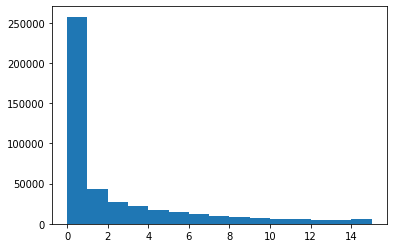

In [15]:
#print(N_Pin)
plt.hist(N_P, bins = 15, range = (0, 15))